In [1]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt 


import IMProToo
import xarray as xr
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
import matplotlib.dates as mdates
import os
import datetime as dt



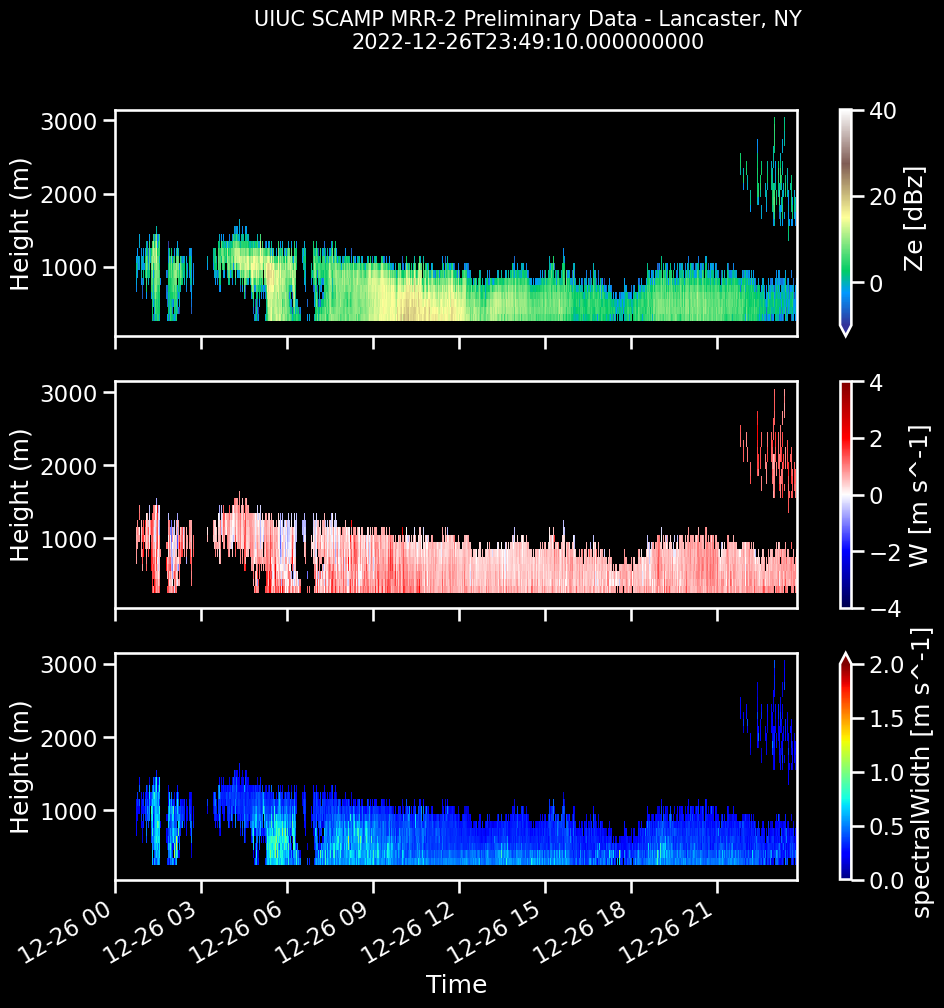

In [15]:
yyyymmdd = '20221226'
time = dt.datetime(2022,12,26)

yyyymm = time.strftime('%Y%m')
mmdd = time.strftime('%m%d')
input_file = '/data/accp/a/snesbitt/scamp/mrr/RawSpectra/'+yyyymm+'/'+mmdd+'.raw'
#output_dir = os.path.dirname(input_file.replace('RawSpectra','processed'))
fileOut = input_file.replace('raw','nc').replace('RawSpectra','processed')
imageOut = fileOut.replace('nc','png')
savedimage = '/data/keeling/a/mp46/Research/Saved_Images/MRR_NWS_BUF_20221118_snow.png'

ds = xr.open_mfdataset(fileOut)
ds['height']=ds['height'].isel(time=0)

ds = ds.swap_dims({'range':'height'})

fig,ax = plt.subplots(nrows=3, figsize=(11,10), sharex=True)
ds['Ze'].T.plot(ax=ax[0], vmin=-10,vmax=40,cmap='terrain')
ax[0].set_xlabel('')
ds['W'].T.plot(ax=ax[1], vmin=-4,vmax=4,cmap='seismic')
ax[1].set_xlabel('')
ds['spectralWidth'].T.plot(ax=ax[2], vmin=0,vmax=2,cmap='jet')
ax[2].set_xlabel('Time')
ax[0].set_ylabel('Height (m)')
ax[1].set_ylabel('Height (m)')
ax[2].set_ylabel('Height (m)')

#cbar = plt.colorbar(heatmap)

#cbar.ax.set_ylabel('# of contacts', rotation=270)

fig.suptitle('UIUC SCAMP MRR-2 Preliminary Data - Lancaster, NY\n'+str(ds.time.values[-1]),fontsize=15);
#fig.suptitle('MQT MRR-2 Preliminary Data - Marquette, MI\n'+str(ds.time.values[0]),fontsize=15);
plt.savefig('/data/keeling/a/mp46/Research/Saved_Images/Gauge_Parsivel_Rain_Cases/MRR_BUF'+yyyymmdd+'.png')
#plt.savefig(savedimage,dpi=150)
